In [15]:
import pandas as pd
import numpy as np

np.random.seed(10)
s = pd.Series(np.random.randint(101, size = 5))
s[6] = 201
s["a"] = 88
s[1001] = np.nan
s[2000] = ""
s[150] = False
s[1800] = np.inf
s

0         9.0
1       100.0
2        15.0
3        64.0
4        28.0
6       201.0
a        88.0
1001      NaN
2000         
150     False
1800      inf
dtype: object

In [3]:
#調整索引值

#法1:直接改掉索引值，缺點是要修改要 "一次性" 修改，僅適用少量範圍

s.index = range(len(s.index))
s

0       9.0
1     100.0
2      15.0
3      64.0
4      28.0
5     201.0
6      88.0
7       NaN
8          
9     False
10      inf
dtype: object

In [12]:
#法2:可適用大索引範圍

s.reset_index()

,index,0
0,0.00,9.0
1,1.00,100.0
2,2.00,15.0
3,3.00,64.0
4,4.00,28.0
5,6.00,201.0
6,3.14,88.0
7,1001.00,NaN
8,2000.00,
9,150.00,False


In [13]:
#法2:

s.reset_index(drop = True) #要加drop把舊的索引值丟掉
s

0.00         9.0
1.00       100.0
2.00        15.0
3.00        64.0
4.00        28.0
6.00       201.0
3.14        88.0
1001.00      NaN
2000.00         
150.00     False
1800.00      inf
dtype: object

In [18]:
#法3:可單獨指定修改

s = s.rename(index = {6:5, "a":6, 1001:7, 2000:8, 150:9, 1800:10})
s

0       9.0
1     100.0
2      15.0
3      64.0
4      28.0
5     201.0
6      88.0
7       NaN
8          
9     False
10      inf
dtype: object

In [19]:
s.index.name = "這是Series"
s

這是Series
0       9.0
1     100.0
2      15.0
3      64.0
4      28.0
5     201.0
6      88.0
7       NaN
8          
9     False
10      inf
dtype: object

In [20]:
s.isna() #確認是否缺失值

這是Series
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
dtype: bool

In [21]:
s.isnull() #確認是否缺失值

這是Series
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
dtype: bool

In [22]:
s.isna().sum()

1

In [23]:
s.isnull().sum()

1

In [24]:
s.notna() #判斷是否有缺資料

這是Series
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
dtype: bool

In [25]:
s.notnull() #判斷是否有缺資料

這是Series
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
dtype: bool

In [28]:
s.notna().sum() == len(s.index) #False代表有缺資料

False

In [29]:
s.notnull().sum() == len(s.index)

False

In [31]:
s.isna().all() # 判斷是否全部為True，False代表有缺資料

False

In [32]:
s.isnull().all()

False

In [33]:
s.isna().any() #只要有一個為True，就為True，全部為False，才會是False

True

In [34]:
s.isnull().any()

True

In [39]:
import pandas as pd
import numpy as np

np.random.seed(5)
s1 = pd.Series(np.random.randint(101,size = 5))
np.random.seed(10)
s2 = pd.Series(np.random.randint(101,size = 5))
s3 = pd.concat([s1, s2])
s3

0     99
1     78
2     61
3     16
4     73
0      9
1    100
2     15
3     64
4     28
dtype: int32

In [40]:
s3[2]

2    61
2    15
dtype: int32

In [42]:
s3[2] = 1000 #沒有改好索引值，會造成 資料出錯
s3

0      99
1      78
2    1000
3      16
4      73
0       9
1     100
2    1000
3      64
4      28
dtype: int32

In [20]:
import requests
import pandas as pd
import datetime as dt
url = 'https://www.taifex.com.tw/cht/3/pcRatio?down_type=&queryStartDate=2023%2F09%2F01&queryEndDate=2023%2F09%2F30'
df1 = pd.read_html(url)[3]
url = 'https://www.taifex.com.tw/cht/3/pcRatio?down_type=&queryStartDate=2023%2F10%2F01&queryEndDate=2023%2F10%2F31'
df2 = pd.read_html(url)[3]
df = pd.concat([df1, df2], ignore_index = True)
df['日期'] = df['日期'].apply(lambda x: dt.datetime.strptime(x, '%Y/%m/%d'))
df.sort_values(['日期'])

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
19,2023-09-01,248350,239019,103.90,212099,208233,101.86
18,2023-09-04,350127,311603,112.36,242994,222804,109.06
17,2023-09-05,219787,194175,113.19,259908,240893,107.89
16,2023-09-06,436335,427740,102.01,166813,166136,100.41
15,2023-09-07,249520,252805,98.70,207695,213423,97.32
14,2023-09-08,263273,254575,103.42,240248,236515,101.58
13,2023-09-11,314001,390462,80.42,246445,274340,89.83
12,2023-09-12,374338,347670,107.67,277003,275107,100.69
11,2023-09-13,489468,436268,112.19,179325,178957,100.21
10,2023-09-14,339219,273437,124.06,243539,206315,118.04


### axis = 1，水平合併，會依據index為主
### axis = 0，垂直合併
兩個Serise合併，變成一個Dataframe

In [2]:
import pandas as pd
import numpy as np

np.random.seed(5)
s1 = pd.Series(np.random.randint(101,size = 5), index = [1,2,3,4,5])
np.random.seed(10)
s2 = pd.Series(np.random.randint(101,size = 5), index = [0,2,4,6,8])
s3 = pd.concat([s1, s2], axis = 1)
s3

,0,1
1,99.0,NaN
2,78.0,100.0
3,61.0,NaN
4,16.0,15.0
5,73.0,NaN
0,NaN,9.0
6,NaN,64.0
8,NaN,28.0


In [3]:
type(s3)

pandas.core.frame.DataFrame

In [4]:
s3.isna()

,0,1
1,False,True
2,False,False
3,False,True
4,False,False
5,False,True
0,True,False
6,True,False
8,True,False


In [5]:
s3.isna().sum()

0    3
1    3
dtype: int64

In [6]:
s3.isna().all()

0    False
1    False
dtype: bool

In [7]:
s3.style.highlight_null("red")

,0,1
1,99.000000,nan
2,78.000000,100.000000
3,61.000000,nan
4,16.000000,15.000000
5,73.000000,nan
0,nan,9.000000
6,nan,64.000000
8,nan,28.000000


rgb
https://www.w3schools.com/colors/colors_rgb.asp

In [8]:
s3.style.highlight_null("#ff00c9")

,0,1
1,99.000000,nan
2,78.000000,100.000000
3,61.000000,nan
4,16.000000,15.000000
5,73.000000,nan
0,nan,9.000000
6,nan,64.000000
8,nan,28.000000


In [12]:
(s3.style.highlight_null("red")
.highlight_max(color = "#ff00c9")
.highlight_min(color = "green")
.format('{:.0f}')) #把小數點拿掉

,0,1
1,99,nan
2,78,100
3,61,nan
4,16,15
5,73,nan
0,nan,9
6,nan,64
8,nan,28


In [21]:
def f(x):
    if x>60:
        return 'color:#71d26b'
(s3.style.highlight_null('#eed26b')
.highlight_max(color = 'red')
.highlight_min(color = 'green')
.format('{:.0f}')
.applymap(f))

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_15536\3606629816.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(f))


,0,1
1,99,nan
2,78,100
3,61,nan
4,16,15
5,73,nan
0,nan,9
6,nan,64
8,nan,28


In [25]:
def f1(x):
    if x>=110:
        return "color:red"
    elif x<=80:
        return "color:gray"
    
def f2(x):
    if x>=110:
        return "background-color:yellow"
    elif x<=80:
        return "background-color:green"
    
(df.style.applymap(f1, subset = ['買賣權未平倉量比率%', "買賣權成交量比率%"])
 .applymap(f2, subset = ['買賣權未平倉量比率%', "買賣權成交量比率%"]))

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_15536\34595659.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  (df.style.applymap(f1, subset = ['買賣權未平倉量比率%', "買賣權成交量比率%"])


,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2023-09-28 00:00:00,283833,272022,104.340000,166908,192291,86.800000
1,2023-09-27 00:00:00,532947,505175,105.500000,120829,147928,81.680000
2,2023-09-26 00:00:00,421773,409734,102.940000,230982,265937,86.860000
3,2023-09-25 00:00:00,333852,271788,122.840000,228459,228604,99.940000
4,2023-09-22 00:00:00,289330,276500,104.640000,189011,228409,82.750000
5,2023-09-21 00:00:00,286885,344468,83.280000,151640,202302,74.960000
6,2023-09-20 00:00:00,564784,546200,103.400000,96992,119608,81.090000
7,2023-09-19 00:00:00,343279,384271,89.330000,276245,302503,91.320000
8,2023-09-18 00:00:00,292397,352765,82.890000,274693,275187,99.820000
9,2023-09-15 00:00:00,278525,231973,120.070000,261610,221675,118.020000


In [32]:
import pandas as pd
import numpy as np

bins = [0,20,40,60,80,100]
labels = ["青少年", "年輕人", "中壯年", "老年人", "高齡族"]
np.random.seed(5)
s = pd.Series(np.random.randint(101,size = 10))

df = pd.DataFrame({
    "年齡":s,
    "階層":pd.cut(s, bins = bins, labels = labels)
})
df

,年齡,階層
0,99,高齡族
1,78,老年人
2,61,老年人
3,16,青少年
4,73,老年人
5,8,青少年
6,100,高齡族
7,62,老年人
8,27,年輕人
9,30,年輕人


In [34]:
df1 = df.groupby("階層").count()
df1

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_15536\730840724.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby("階層").count()


,年齡
階層,
青少年,2
年輕人,2
中壯年,0
老年人,4
高齡族,2


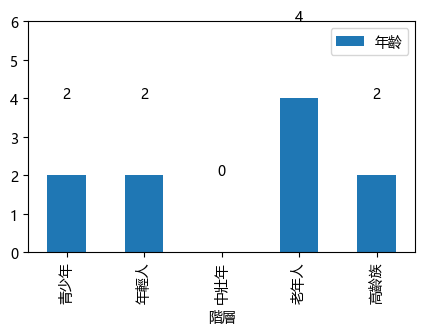

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] =  "Microsoft Yahei"
df1.plot(kind = "bar", figsize = (5, 3))
plt.ylim(0,6)

for idx, value in enumerate(df1.values):
    text = "{}".format(value[0])
    plt.annotate(text, (idx, value[0] + 2), ha = "center")

```Python
#產生日期
#指定日期格式:2023/1/1、2023-1-1

pd.date_range("指定日期", periods = 指定數量, freq = offset單位)

#產生週期
#指定日期格式:2023/1/1、2023-1-1

pd.periods_range("指定日期", periods = 指定數量, freq = offset單位)
```

[offset aliases](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases)

In [56]:
import pandas as pd
import numpy as np

size = 10
np.random.seed(10)
datelist = pd.date_range("2022/1/1", periods = size, freq = "D")
s = pd.Series(np.random.randint(101,size = size), index = datelist)
s

2022-01-01      9
2022-01-02    100
2022-01-03     15
2022-01-04     64
2022-01-05     28
2022-01-06     89
2022-01-07     93
2022-01-08     29
2022-01-09      8
2022-01-10     73
Freq: D, dtype: int32

In [54]:
pd.date_range("2022/1/1", periods = 10, freq = "Q")

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [48]:
pd.Timestamp.min, pd.Timestamp.max

(Timestamp('1677-09-21 00:12:43.145224193'),
 Timestamp('2262-04-11 23:47:16.854775807'))

In [49]:
pd.date_range("2262-04-11", periods = size, freq = "Q")

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2262-06-30 00:00:00

In [51]:
pd.period_range("2022/1/1", periods = 10, freq = "Q")

PeriodIndex(['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2',
             '2023Q3', '2023Q4', '2024Q1', '2024Q2'],
            dtype='period[Q-DEC]')

In [52]:
pd.period_range("2262-04-11", periods = 10, freq = "Q")

PeriodIndex(['2262Q2', '2262Q3', '2262Q4', '2263Q1', '2263Q2', '2263Q3',
             '2263Q4', '2264Q1', '2264Q2', '2264Q3'],
            dtype='period[Q-DEC]')

In [57]:
import pandas as pd
import numpy as np

size = 10
np.random.seed(10)
datelist = pd.date_range("2022/1/1", periods = size, freq = "D")
s = pd.Series(np.random.randint(101,size = size), index = datelist)
s

2022-01-01      9
2022-01-02    100
2022-01-03     15
2022-01-04     64
2022-01-05     28
2022-01-06     89
2022-01-07     93
2022-01-08     29
2022-01-09      8
2022-01-10     73
Freq: D, dtype: int32

In [59]:
s["2022-01-02":"2022-01-07"]

2022-01-02    100
2022-01-03     15
2022-01-04     64
2022-01-05     28
2022-01-06     89
2022-01-07     93
Freq: D, dtype: int32

In [62]:
import pandas as pd
import numpy as np

size = 10
np.random.seed(10)
datelist = pd.date_range("2022/1/1", periods = size, freq = "M")
s = pd.Series(np.random.randint(101,size = size), index = datelist)
s["2022-03":"2022-06"]

2022-03-31    15
2022-04-30    64
2022-05-31    28
2022-06-30    89
Freq: M, dtype: int32

In [63]:
import pandas as pd
import numpy as np

size = 10
np.random.seed(10)
datelist = pd.date_range("2022/1/1", periods = size, freq = "Y")
s = pd.Series(np.random.randint(101,size = size), index = datelist)
s["2025":"2030"]

2025-12-31    64
2026-12-31    28
2027-12-31    89
2028-12-31    93
2029-12-31    29
2030-12-31     8
Freq: A-DEC, dtype: int32

In [104]:
import pandas as pd

df = pd.read_csv("time_data.csv")
df

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238
...,...,...,...,...,...,...
332,2021-12-24 01AM,51350.01,51375.00,50843.12,50877.38,3037.17958
333,2021-12-24 02AM,51044.02,51527.58,51015.55,51350.01,2286.33021
334,2021-12-24 03AM,51029.99,51167.46,50851.02,51044.02,1260.66778
335,2021-12-24 04AM,50951.47,51109.09,50926.55,51030.00,560.59259


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         337 non-null    object 
 1   Close Price  337 non-null    float64
 2   High Price   337 non-null    float64
 3   Low Price    337 non-null    float64
 4   Open Price   337 non-null    float64
 5   Volume       337 non-null    float64
dtypes: float64(5), object(1)
memory usage: 15.9+ KB


In [105]:
import datetime as dt
df["Date"] = df["Date"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H%p"))
df

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05:00:00,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06:00:00,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07:00:00,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08:00:00,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09:00:00,48366.37,48495.00,47869.80,48090.35,1232.30238
...,...,...,...,...,...,...
332,2021-12-24 01:00:00,51350.01,51375.00,50843.12,50877.38,3037.17958
333,2021-12-24 02:00:00,51044.02,51527.58,51015.55,51350.01,2286.33021
334,2021-12-24 03:00:00,51029.99,51167.46,50851.02,51044.02,1260.66778
335,2021-12-24 04:00:00,50951.47,51109.09,50926.55,51030.00,560.59259


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         337 non-null    datetime64[ns]
 1   Close Price  337 non-null    float64       
 2   High Price   337 non-null    float64       
 3   Low Price    337 non-null    float64       
 4   Open Price   337 non-null    float64       
 5   Volume       337 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 15.9 KB


In [79]:
period = "2H"
df.set_index("Date").resample(period)["Volume"].sum()

Date
2021-12-10 04:00:00     827.39761
2021-12-10 06:00:00    3596.04181
2021-12-10 08:00:00    2603.55685
2021-12-10 10:00:00    2775.02096
2021-12-10 12:00:00    6016.20315
                          ...    
2021-12-23 20:00:00    3116.01720
2021-12-23 22:00:00    1907.10467
2021-12-24 00:00:00    4295.75029
2021-12-24 02:00:00    3546.99799
2021-12-24 04:00:00    1326.51725
Freq: 2H, Name: Volume, Length: 169, dtype: float64

In [85]:
#資料時間週期轉換
period = "D"
df1 = pd.DataFrame({
    "open":df.set_index("Date").resample(period)["Open Price"].first(),
    "heigh":df.set_index("Date").resample(period)["High Price"].max(),
    "low":df.set_index("Date").resample(period)["Low Price"].min(),
    "close":df.set_index("Date").resample(period)["Close Price"].last(),
    "Volume":df.set_index("Date").resample(period)["Volume"].sum()
})
df1

,open,heigh,low,close,Volume
Date,,,,,
2021-12-10,48170.66,50125.00,46852.00,47140.54,37030.49192
2021-12-11,47140.54,49485.71,46751.00,49389.99,28889.19358
2021-12-12,49389.99,50777.00,48638.00,50053.90,26017.93421
2021-12-13,50053.90,50189.97,45672.75,46702.75,50869.52093
2021-12-14,46702.76,48700.41,46290.00,48343.28,39955.98445
2021-12-15,48336.95,49500.00,46547.00,48864.98,51629.18100
2021-12-16,48864.98,49436.43,47511.00,47632.38,31949.86739
2021-12-17,47632.38,47995.96,45456.00,46131.20,43104.48870
2021-12-18,46133.83,47392.37,45500.00,46834.48,25020.05271


## 時間分三種格式
```Python
#結構化時間
dt.datetime.today().year
dt.datetime.today().month
dt.datetime.today().day
dt.datetime.today().hour
dt.datetime.today().minute
dt.datetime.today().second

#時間戳記:
從 1970/1/1 00:00:00 紀錄至今的所有秒數，長度10位
        
#格式化時間:時間轉成字串
```

In [86]:
import datetime as dt

dt.datetime.today(), dt.datetime.now()

(datetime.datetime(2023, 11, 5, 14, 6, 18, 598781),
 datetime.datetime(2023, 11, 5, 14, 6, 18, 598781))

### 結構化時間

In [89]:
print("Year:", dt.datetime.today().year)
print("month:", dt.datetime.today().month)
print("day:", dt.datetime.today().day)
print("hour:", dt.datetime.today().hour)
print("minute:", dt.datetime.today().minute)
print("second:", dt.datetime.today().second)

Year: 2023
month: 11
day: 5
hour: 14
minute: 9
second: 32


In [90]:
print("Year:", dt.datetime.now().year)
print("month:", dt.datetime.now().month)
print("day:", dt.datetime.now().day)
print("hour:", dt.datetime.now().hour)
print("minute:", dt.datetime.now().minute)
print("second:", dt.datetime.now().second)

Year: 2023
month: 11
day: 5
hour: 14
minute: 9
second: 33


In [92]:
dt.datetime(2022, 3, 1, 5, 30, 20) #2022/3/1 17:30:20

datetime.datetime(2022, 3, 1, 5, 30, 20)

### 時間戳記

In [95]:
dt.datetime.today().timestamp()

1699165170.017923

In [96]:
int(dt.datetime.today().timestamp())

1699165170

In [100]:
#時間戳記轉換回時間
timestamp = dt.datetime.today().timestamp()
dt.datetime.fromtimestamp(timestamp)

datetime.datetime(2023, 11, 5, 14, 21, 49, 51832)

### 格式化時間

#### 時間轉字串

In [101]:
t = dt.datetime.today()
print(t.strftime("%Y-%m-%d"))
print(dt.datetime.strftime(t, "%Y-%m-%d"))

2023-11-05
2023-11-05


#### 字串轉時間

In [103]:
s = "2023-11-05"
print(dt.datetime.strptime(s, "%Y-%m-%d"))

2023-11-05 00:00:00


In [108]:
import pandas as pd
import numpy as np

np.random.seed(7)
df = pd.DataFrame(np.random.randint(101, size = (4, 3)))
df

,0,1,2
0,47,68,25
1,67,83,23
2,92,57,14
3,23,72,89


In [109]:
import pandas as pd
import numpy as np

np.random.seed(7)
s = pd.Series(np.random.randint(101, size = 4))
s

0    47
1    68
2    25
3    67
dtype: int32

In [110]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [111]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int32
 1   1       4 non-null      int32
 2   2       4 non-null      int32
dtypes: int32(3)
memory usage: 176.0 bytes


In [114]:
df.describe() #描述性統計

,0,1,2
count,4.000000,4.000000,4.00
mean,57.250000,70.000000,37.75
std,29.330019,10.739336,34.50
min,23.000000,57.000000,14.00
25%,41.000000,65.250000,20.75
50%,57.000000,70.000000,24.00
75%,73.250000,74.750000,41.00
max,92.000000,83.000000,89.00


In [115]:
df.memory_usage()

Index    128
0         16
1         16
2         16
dtype: int64

In [116]:
df.memory_usage().sum()

176

In [117]:
df.memory_usage(deep = True).sum()

176

In [118]:
df.astype("int16").info() #這樣只是查詢，要更改要複寫進去

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int16
 1   1       4 non-null      int16
 2   2       4 non-null      int16
dtypes: int16(3)
memory usage: 152.0 bytes


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int32
 1   1       4 non-null      int32
 2   2       4 non-null      int32
dtypes: int32(3)
memory usage: 176.0 bytes


In [121]:
df = df.astype("int16")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int16
 1   1       4 non-null      int16
 2   2       4 non-null      int16
dtypes: int16(3)
memory usage: 152.0 bytes


In [122]:
df.memory_usage(deep = True).sum()

152

- 1MB = 1024KB
- 1KB = 1024B

In [1]:
import pandas as pd
import numpy as np

size = 5
np.random.seed(7)
df = pd.DataFrame({
    "座號":range(size),
    "姓名":["張大光","王小名","吳大志","曾美麗","曾高興"],
    "國文":np.random.randint(101, size = size),
    "英文":np.random.randint(101, size = size),
})
df

,座號,姓名,國文,英文
0,0,張大光,47,23
1,1,王小名,68,92
2,2,吳大志,25,57
3,3,曾美麗,67,14
4,4,曾高興,83,23


#### 新增資料

```Python
df.insert(資料插入的索引位置, 資料的名稱, 資料序列)
```

In [2]:
#法1
df.insert(4, "自然", np.random.randint(101, size = size))
df

,座號,姓名,國文,英文,自然
0,0,張大光,47,23,72
1,1,王小名,68,92,89
2,2,吳大志,25,57,42
3,3,曾美麗,67,14,90
4,4,曾高興,83,23,8


In [3]:
#法2
df.loc[: ,"歷史"] = np.random.randint(101, size = size)
df

,座號,姓名,國文,英文,自然,歷史
0,0,張大光,47,23,72,39
1,1,王小名,68,92,89,68
2,2,吳大志,25,57,42,48
3,3,曾美麗,67,14,90,7
4,4,曾高興,83,23,8,44


In [4]:
#法3

df1 = pd.DataFrame(np.random.randint(101, size = size), columns = ["地理"])
df = pd.concat([df,df1], axis = 1)
df

,座號,姓名,國文,英文,自然,歷史,地理
0,0,張大光,47,23,72,39,0
1,1,王小名,68,92,89,68,75
2,2,吳大志,25,57,42,48,55
3,3,曾美麗,67,14,90,7,6
4,4,曾高興,83,23,8,44,19


 #### 新增紀錄

In [5]:
#法1
df.loc[5] = [5, "陳小美", 35, 40, 80, 67, 95]
df

,座號,姓名,國文,英文,自然,歷史,地理
0,0,張大光,47,23,72,39,0
1,1,王小名,68,92,89,68,75
2,2,吳大志,25,57,42,48,55
3,3,曾美麗,67,14,90,7,6
4,4,曾高興,83,23,8,44,19
5,5,陳小美,35,40,80,67,95


In [6]:
#法2

df1 = pd.DataFrame([6, "李大同", 62, 71, 43, 52, 96], index = df.columns)
df = pd.concat([df, df1.T], ignore_index = True)
df

,座號,姓名,國文,英文,自然,歷史,地理
0,0,張大光,47,23,72,39,0
1,1,王小名,68,92,89,68,75
2,2,吳大志,25,57,42,48,55
3,3,曾美麗,67,14,90,7,6
4,4,曾高興,83,23,8,44,19
5,5,陳小美,35,40,80,67,95
6,6,李大同,62,71,43,52,96


In [7]:
def f1(x):
    if x < 60:
        return "color:red"
    
def f2(x):
    if x < 60:
        return "background-color:yellow"
df.style.applymap(f1, subset = df.columns[2:]).applymap(f2, subset = df.columns[2:])

C:\Users\Lo yuan\AppData\Local\Temp\ipykernel_22324\2334869714.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(f1, subset = df.columns[2:]).applymap(f2, subset = df.columns[2:])


,座號,姓名,國文,英文,自然,歷史,地理
0,0,張大光,47,23,72,39,0
1,1,王小名,68,92,89,68,75
2,2,吳大志,25,57,42,48,55
3,3,曾美麗,67,14,90,7,6
4,4,曾高興,83,23,8,44,19
5,5,陳小美,35,40,80,67,95
6,6,李大同,62,71,43,52,96


In [8]:
df["總分"] = df.apply(lambda x:x[2:7].sum(), axis = 1)
df["平均"] = df.apply(lambda x:x[2:7].sum()/5, axis = 1)
df

,座號,姓名,國文,英文,自然,歷史,地理,總分,平均
0,0,張大光,47,23,72,39,0,181,36.2
1,1,王小名,68,92,89,68,75,392,78.4
2,2,吳大志,25,57,42,48,55,227,45.4
3,3,曾美麗,67,14,90,7,6,184,36.8
4,4,曾高興,83,23,8,44,19,177,35.4
5,5,陳小美,35,40,80,67,95,317,63.4
6,6,李大同,62,71,43,52,96,324,64.8


In [12]:
df.to_csv("成績.csv", encoding = "big5", index = False) #big5, big5hkscs, utf_8_sig，輸出顯示中文字

In [13]:
df1 = pd.read_csv("成績.csv", encoding = "big5")
df1

,座號,姓名,國文,英文,自然,歷史,地理,總分,平均
0,0,張大光,47,23,72,39,0,181,36.2
1,1,王小名,68,92,89,68,75,392,78.4
2,2,吳大志,25,57,42,48,55,227,45.4
3,3,曾美麗,67,14,90,7,6,184,36.8
4,4,曾高興,83,23,8,44,19,177,35.4
5,5,陳小美,35,40,80,67,95,317,63.4
6,6,李大同,62,71,43,52,96,324,64.8


In [15]:
df.to_excel("成績.xlsx", index = False)

In [19]:
df1 = pd.read_excel("成績.xlsx")
df1

,座號,姓名,國文,英文,自然,歷史,地理,總分,平均
0,0,張大光,47,23,72,39,0,181,36.2
1,1,王小名,68,92,89,68,75,392,78.4
2,2,吳大志,25,57,42,48,55,227,45.4
3,3,曾美麗,67,14,90,7,6,184,36.8
4,4,曾高興,83,23,8,44,19,177,35.4
5,5,陳小美,35,40,80,67,95,317,63.4
6,6,李大同,62,71,43,52,96,324,64.8


In [23]:
import sqlite3 as lite
with lite.connect("學生成績.db") as con:
    df.to_sql('成績', con = con, if_exists = "replace")

In [24]:
import sqlite3 as lite
with lite.connect("學生成績.db") as con:
    df1 = pd.read_sql_query("SELECT * FROM 考試成績;", con = con, index_col = "index")
df1

DatabaseError: Execution failed on sql 'SELECT * FROM 考試成績;': no such table: 考試成績